In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df_churn=pd.read_csv("customer_churn_analysis.csv")
df_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#Lets do the conversion of "TotalCharges" column to float type
df_churn["TotalCharges"]=df_churn["TotalCharges"].str.strip()
df_churn["TotalCharges"]=pd.to_numeric(df_churn["TotalCharges"])

In [6]:
#total charges are changed to float
df_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
df_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#lets chcek the rows where it raised null values
df_churn.loc[df_churn["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
#replacing null values with mean
df_churn["TotalCharges"].fillna(df_churn["TotalCharges"].mean(),inplace=True)

In [10]:
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df_churn.drop(columns=["customerID"],inplace=True)

In [12]:
#Lets chcek the value counts of each column of object datatype
for col in df_churn.columns:
    if df_churn[col].dtype=="object":
        print(df_churn[col].value_counts())
        print()

Male      3555
Female    3488
Name: gender, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes                    2707
No internet service    1526
Name: S

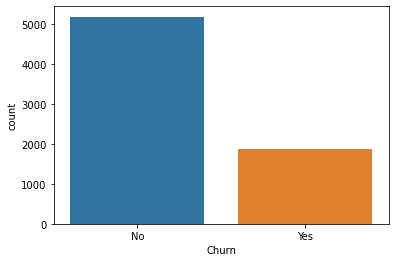

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Churn",data=df_churn)
plt.show()

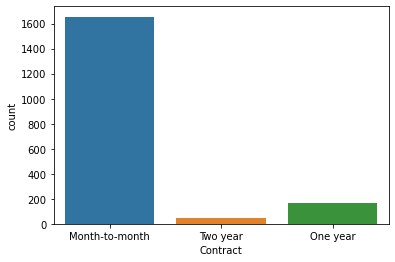

In [14]:
sns.countplot(x="Contract",data=df_churn.loc[df_churn["Churn"]=="Yes"])
plt.show()

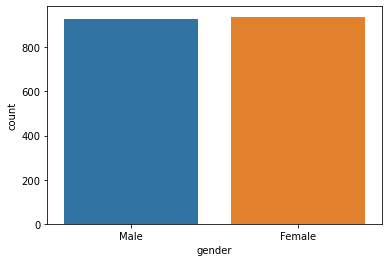

In [15]:
sns.countplot(x="gender",data=df_churn.loc[df_churn["Churn"]=="Yes"])
plt.show()

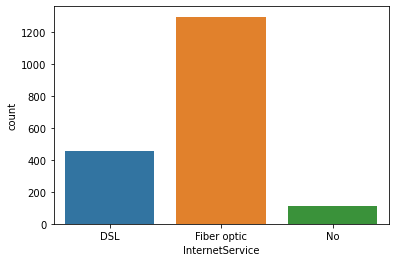

In [16]:
sns.countplot(x="InternetService",data=df_churn.loc[df_churn["Churn"]=="Yes"])
plt.show()

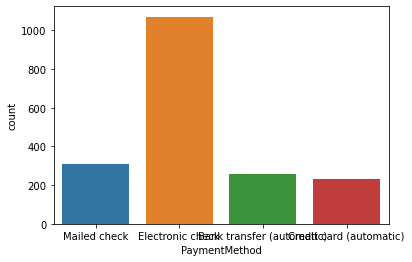

In [17]:
sns.countplot(x="PaymentMethod",data=df_churn.loc[df_churn["Churn"]=="Yes"])
plt.show()

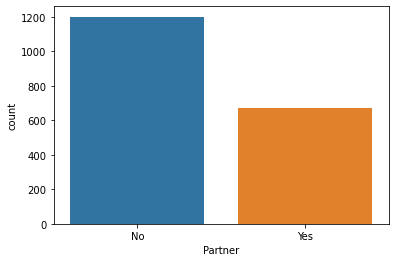

In [18]:
sns.countplot(x="Partner",data=df_churn.loc[df_churn["Churn"]=="Yes"])
plt.show()

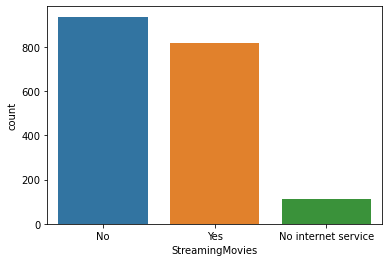

In [19]:
sns.countplot(x="StreamingMovies",data=df_churn.loc[df_churn["Churn"]=="Yes"])
plt.show()

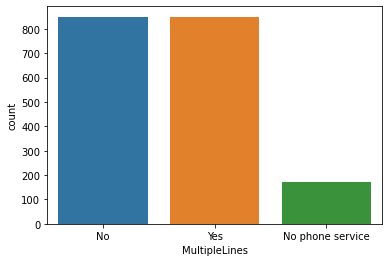

In [20]:
sns.countplot(x="MultipleLines",data=df_churn.loc[df_churn["Churn"]=="Yes"])
plt.show()

In [21]:
df_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

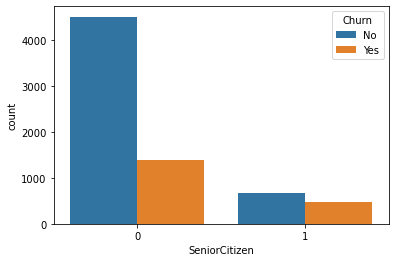

In [22]:
sns.countplot(x="SeniorCitizen",hue="Churn",data=df_churn)
plt.show()

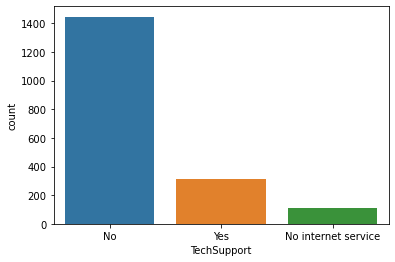

In [23]:
sns.countplot(x="TechSupport",data=df_churn.loc[df_churn["Churn"]=="Yes"])
plt.show()

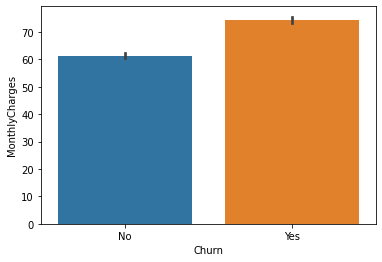

In [24]:
sns.barplot(x="Churn",y="MonthlyCharges",data=df_churn)
plt.show()

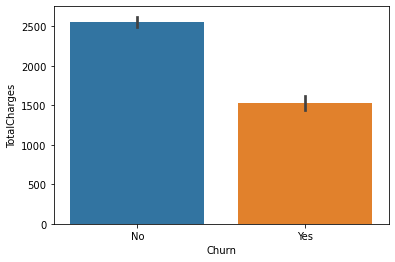

In [25]:
sns.barplot(x="Churn",y="TotalCharges",data=df_churn)
plt.show()

In [26]:
df_x=df_churn.drop(columns=["Churn"])
y=df_churn[["Churn"]]

In [27]:
df_x=pd.get_dummies(df_x,drop_first=True)

In [28]:
df_x.shape

(7043, 30)

In [29]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)

In [37]:
#let's bring the features to same scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [40]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("Best accuracy is ", maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.8211074301940369 on Random_state  174


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=174)

In [42]:
model=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB()]

In [43]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Acuuracy score of ",m,"is ")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Acuuracy score of  LogisticRegression() is 
0.8211074301940369
[[1408  156]
 [ 222  327]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1564
           1       0.68      0.60      0.63       549

    accuracy                           0.82      2113
   macro avg       0.77      0.75      0.76      2113
weighted avg       0.82      0.82      0.82      2113



Acuuracy score of  DecisionTreeClassifier() is 
0.7326076668244202
[[1265  299]
 [ 266  283]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1564
           1       0.49      0.52      0.50       549

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.74      0.73      0.74      2113



Acuuracy score of  RandomForestClassifier() is 
0.8007572172266919
[[1411  153]
 [ 268  281]]
              precision    recall  f1-score   support

         

In [44]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(LogisticRegression(),x,y,cv=5).mean())

0.8036360208723142


In [45]:
print(cross_val_score(RandomForestClassifier(),x,y,cv=5).mean())

0.788871056197174


In [46]:
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean())

0.7268221941738177


In [47]:
print(cross_val_score(GaussianNB(),x,y,cv=5).mean())

0.6623566439770309


Minimum difference in accuracy and cross_val_score is for Decision Tree Classifier and f1_score is also good, so this our best model


# Hyper Parameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
parameters={'criterion':['gini','entropy'],'max_features':[1,100]}
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [1, 100]})

In [50]:
GCV.best_params_

{'criterion': 'entropy', 'max_features': 1}

In [54]:
Final_mod=DecisionTreeClassifier(criterion='entropy',max_features=1)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
accu=accuracy_score(y_test,pred)
print(accu*100)
print(classification_report(y_test,pred))

74.3019403691434
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1564
           1       0.51      0.50      0.50       549

    accuracy                           0.74      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.74      0.74      0.74      2113



# Saving Model

In [61]:
import joblib
joblib.dump(Final_mod,"customer_churn_analysis.obj")

['customer_churn_analysis.obj']

In [62]:
#loading the model
model=joblib.load("customer_churn_analysis.obj")
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])